In [42]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [45]:
df = pd.read_csv('Mall_Customers.csv')

label_encoder = LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])

df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


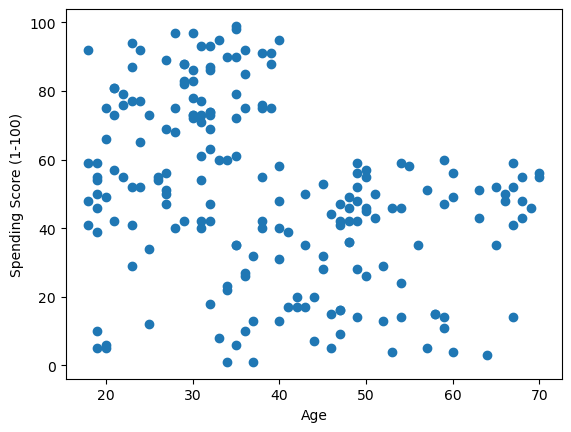

In [46]:
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.scatter(df['Age'], df['Spending Score (1-100)'])

In [57]:
scaler = MinMaxScaler()

scaler.fit(df[['Spending Score (1-100)']])
df['Spending Score (1-100)'] = scaler.transform(df[['Spending Score (1-100)']])


scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])


scaler.fit(df[['Annual Income (k$)']])
df['Annual Income (k$)'] = scaler.transform(df[['Annual Income (k$)']])
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1.0,0.019231,0.000000,0.387755
1,2,1.0,0.057692,0.000000,0.816327
2,3,0.0,0.038462,0.008197,0.051020
3,4,0.0,0.096154,0.008197,0.775510
4,5,0.0,0.250000,0.016393,0.397959
...,...,...,...,...,...
195,196,0.0,0.326923,0.860656,0.795918
196,197,0.0,0.519231,0.909836,0.275510
197,198,1.0,0.269231,0.909836,0.744898
198,199,1.0,0.269231,1.000000,0.173469


In [58]:
k_range = range(1, 10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Spending Score (1-100)', 'Annual Income (k$)', 'Gender']])
    sse.append(km.inertia_)

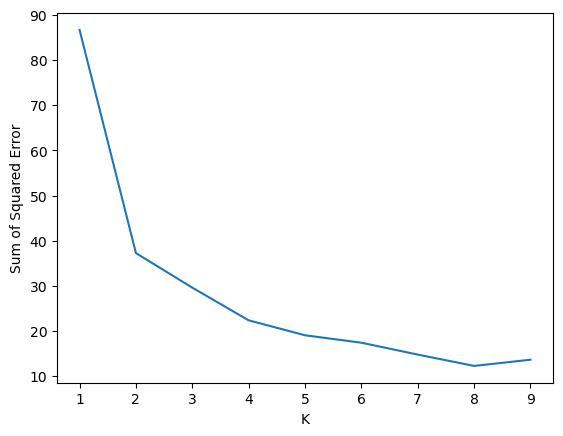

In [59]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_range, sse)

In [60]:
#using the 'Elbow Method', we see a cluster size of 2 is ideal
km = KMeans(n_clusters = 2)
y_predicted = km.fit_predict(df[['Age', 'Spending Score (1-100)', 'Annual Income (k$)', 'Gender']])
y_predicted

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1], dtype=int32)

In [61]:
y_predicted = km.fit_predict(df[['Age', 'Spending Score (1-100)', 'Annual Income (k$)', 'Gender']])
df['Cluster'] = y_predicted
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1.0,0.019231,0.000000,0.387755,0
1,2,1.0,0.057692,0.000000,0.816327,0
2,3,0.0,0.038462,0.008197,0.051020,1
3,4,0.0,0.096154,0.008197,0.775510,1
4,5,0.0,0.250000,0.016393,0.397959,1
...,...,...,...,...,...,...
195,196,0.0,0.326923,0.860656,0.795918,1
196,197,0.0,0.519231,0.909836,0.275510,1
197,198,1.0,0.269231,0.909836,0.744898,0
198,199,1.0,0.269231,1.000000,0.173469,0


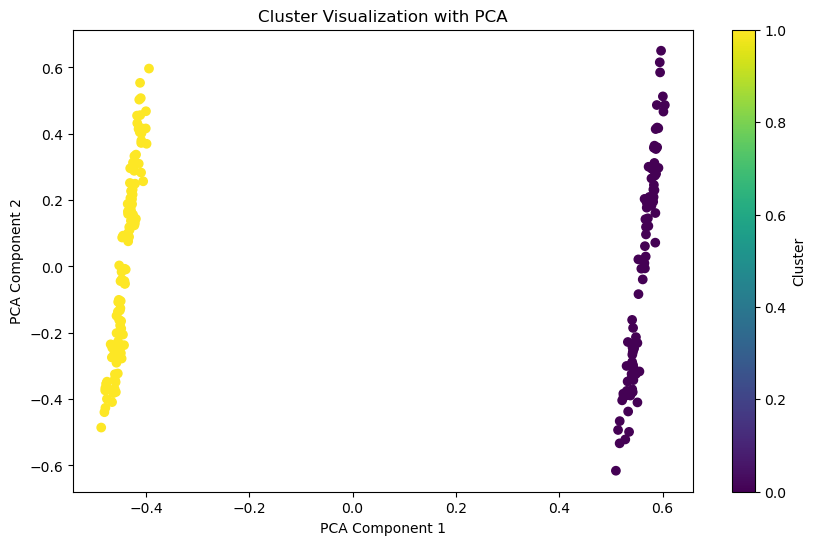

In [63]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce the dataset to 2 dimensions with PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df[['Age', 'Spending Score (1-100)', 'Annual Income (k$)', 'Gender']])

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['Cluster'], cmap='viridis', marker='o')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Visualization with PCA')
plt.colorbar(label='Cluster')
plt.show()
